Starting point

0.5894076314841638
[ 2.5     0.05    0.0875 -0.55    0.05  ]

In [105]:
import warnings
warnings.simplefilter("ignore", RuntimeWarning)

import numpy as np

import importlib
import PricingModel as pm
import Marketpriceplot as mp
import helpers as hl
importlib.reload(pm)
importlib.reload(hl)
importlib.reload(mp)

from matplotlib import cm
import matplotlib.pyplot as plt 
from cycler import cycler
from scipy.optimize import fmin, fmin_bfgs

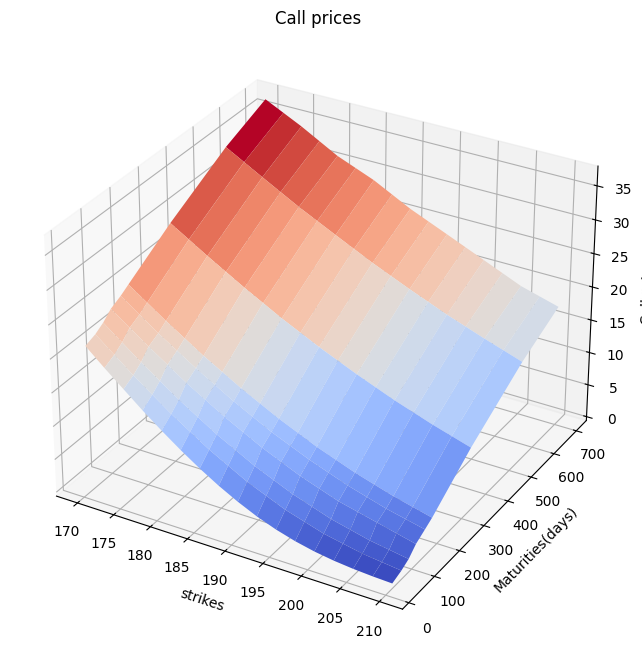

In [48]:
mp.xyz_plot('Call')

maturities = mp.maturities
strikes = mp.strikes
market_prices = mp.option_prices

maturity_years = maturities / 365

In [50]:
model = 'Heston'

S0 = 190.3
r = 0.0245
q = 0.005

alpha = 1.5
eta = 0.2
n = 12


In [85]:
params = [ 2.5, 0.05, 0.0875, -0.55, 0.05  ]

num_iter = 0
arg = (market_prices, maturity_years, strikes, S0, r, q, model, alpha, eta, n)

def callback_f(xi):
    global num_iter, arg
    num_iter += 1
    print(f' i = {num_iter}')
    print(f' x_i = {xi}')
    print(f' f_i = {hl.evalues(xi, *arg)}')

t = fmin(hl.evalues,
         params,
         args = arg,
         xtol = 1e-4,
         ftol = 1e-4,
         maxiter = 200,
         maxfun = 100,
         callback = callback_f,
         disp = True,
         retall = False,
         full_output = True)

print(f' Optimal Params = {t[0]}')
print(f' f = {t[1]}')

 i = 1
 x_i = [ 2.55     0.0475   0.08925 -0.561    0.051  ]
 f_i = 0.5673546279710897
 i = 2
 x_i = [ 2.605     0.0485    0.091175 -0.5731    0.0456  ]
 f_i = 0.4266717797238692
 i = 3
 x_i = [ 2.605     0.0485    0.091175 -0.5731    0.0456  ]
 f_i = 0.4266717797238692
 i = 4
 x_i = [ 2.605     0.0485    0.091175 -0.5731    0.0456  ]
 f_i = 0.4266717797238692
 i = 5
 x_i = [ 2.605     0.0485    0.091175 -0.5731    0.0456  ]
 f_i = 0.4266717797238692
 i = 6
 x_i = [ 2.605     0.0485    0.091175 -0.5731    0.0456  ]
 f_i = 0.4266717797238692
 i = 7
 x_i = [ 2.605     0.0485    0.091175 -0.5731    0.0456  ]
 f_i = 0.4266717797238692
 i = 8
 x_i = [ 2.605     0.0485    0.091175 -0.5731    0.0456  ]
 f_i = 0.4266717797238692
 i = 9
 x_i = [ 2.605     0.0485    0.091175 -0.5731    0.0456  ]
 f_i = 0.4266717797238692
 i = 10
 x_i = [ 2.59502689  0.04841054  0.09633338 -0.56028509  0.04276896]
 f_i = 0.40662901215860403
 i = 11
 x_i = [ 2.62080447  0.05145573  0.09430579 -0.59787725  0.038889

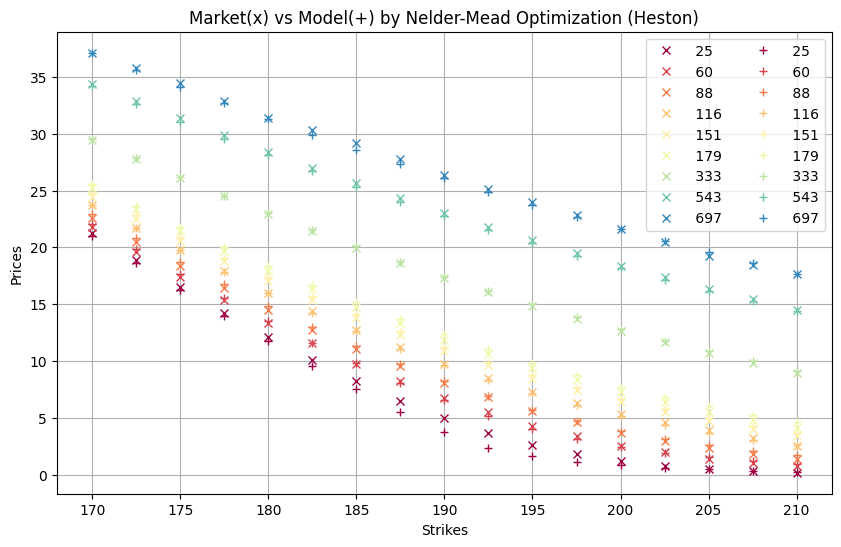

In [117]:
params = t[0]
#f = 0.3420779270822823, param = [ 2.59717452  0.05216056  0.09684271 -0.5699117   0.03913757], for 20 iterations
#Optimal Params = [ 1.25852102  0.0547947   0.11477736 -0.66396558  0.04113456], f = 0.3003236943066487 , for 100 iterations

len_T = len(maturities)
len_K = len(strikes)
model_prices = np.zeros((len_T, len_K))

for i in range(len_T):
    for j in range(len_K):
        T = maturity_years[i]
        K = strikes[j]
        [km, CT_km] = pm.price_fft(S0, r, q, T, model, params, K, alpha, eta, n)
        model_prices[i, j] = CT_km[0]

fig = plt.figure(figsize = (10,6))
ax = plt.gca()
colormap = cm.Spectral

ax.set_prop_cycle(cycler(color = [colormap(i) for i in np.linspace(0, 0.9, len_T)]))

for i in range(len_T):
    ax.plot(strikes, market_prices[i, :], 'x', label = f' {maturities[i]}')

for i in range(len_T):
    ax.plot(strikes, model_prices[i, :], '+', label = f' {maturities[i]}')

plt.title('Market(x) vs Model(+) by Nelder-Mead Optimization (Heston)')
plt.legend(ncol = 2)
plt.xlabel('Strikes')
plt.ylabel('Prices')
plt.grid(0.25)
plt.show()



In [60]:
pr_diff = abs(market_prices - model_prices)

import pandas as pd

diff_price_20 = pd.DataFrame(pr_diff, columns = strikes, index = maturities)
diff_price_20

,170.0,172.5,175.0,177.5,180.0,182.5,185.0,187.5,190.0,192.5,195.0,197.5,200.0,202.5,205.0,207.5,210.0
25,0.691726,0.699172,0.782571,0.790600,0.840405,0.869841,0.866413,0.822367,0.739794,0.609440,0.482181,0.357780,0.246345,0.168511,0.115581,0.080631,0.056140
60,0.387453,0.405415,0.340907,0.365782,0.277137,0.285697,0.154214,0.148272,0.013085,0.006967,0.156549,0.136262,0.257253,0.200544,0.260306,0.184681,0.196556
88,0.321193,0.320494,0.235446,0.230788,0.121989,0.100654,0.040113,0.055399,0.198267,0.207142,0.343301,0.340973,0.457530,0.411258,0.469183,0.394920,0.406538
116,0.578318,0.613749,0.567339,0.556910,0.451013,0.444137,0.331888,0.311128,0.180069,0.163309,0.036822,0.040399,0.059967,0.052782,0.071596,0.002625,0.147478
151,0.253553,0.229591,0.128240,0.132088,0.049348,0.026457,0.089338,0.112423,0.231280,0.220978,0.305692,0.308746,0.402672,0.384294,0.449821,0.407450,0.439980
179,0.190053,0.175201,0.086535,0.045291,0.076758,0.094747,0.198155,0.225789,0.340761,0.367989,0.481717,0.480547,0.562483,0.549986,0.615043,0.591736,0.638815
333,0.184526,0.210872,0.178384,0.173376,0.107419,0.079852,0.009730,0.011464,0.075237,0.075684,0.137207,0.158982,0.239981,0.241480,0.299586,0.300248,0.354283
543,0.301173,0.345251,0.342096,0.328911,0.268027,0.296899,0.278104,0.236836,0.148399,0.138204,0.081763,0.054680,0.017354,0.008568,0.043118,0.057596,0.113533
697,0.085252,0.081746,0.206933,0.115250,0.018276,0.218965,0.414664,0.244085,0.032565,0.030507,0.011620,0.105790,0.238924,0.410390,0.619514,0.465581,0.347836


=========================

BFGS 

In [121]:
params = [ 2.3, 0.05, 0.0875, -0.55, 0.05  ]

num_iter = 0
arg = (market_prices, maturity_years, strikes, S0, r, q, model, alpha, eta, n)

def callback_f(xi):
    global num_iter, arg
    num_iter += 1
    print(f' i = {num_iter}')
    print(f' x_i = {xi}')
    print(f' f_i = {hl.evalues(xi, *arg)}')

t = fmin_bfgs(hl.evalues,
         params,
         args = arg,
         maxiter = 200,
         callback = callback_f,
         disp = True,
         full_output = True)

print(f' Optimal Params = {t[0]}')
print(f' f = {t[1]}')

 i = 1
 x_i = [ 2.23769137 -0.95803132  0.07798709 -0.55        0.05      ]
 f_i = 42710.63631473674
 i = 2
 x_i = [30.81453779 -2.85060844 13.44854966 -0.55        0.05      ]
 f_i = 17.096641420762626
 i = 3
 x_i = [30.81456194 -2.85060944 13.44849791 -0.55        0.05      ]
 f_i = 17.096641420614635
 i = 4
 x_i = [30.89945635 -2.85414005 13.26656741 -0.55        0.05      ]
 f_i = 17.096640576310573
 i = 5
 x_i = [30.90380405 -2.85432087 13.25725018 -0.55        0.05      ]
 f_i = 17.09664057182617
Optimization terminated successfully.
         Current function value: 17.096641
         Iterations: 5
         Function evaluations: 162
         Gradient evaluations: 27
 Optimal Params = [30.90380405 -2.85432087 13.25725018 -0.55        0.05      ]
 f = 17.09664057182617


In [ ]:
1.23354232782125
[ 0.28  0.36 -0.26]

In [87]:
model = 'VG'

S0 = 190.3
r = 0.0245
q = 0.005

alpha = 1.5
eta = 0.2
n = 12


In [93]:
params = [ 0.28,  0.36, -0.26]

num_iter = 0
arg = (market_prices, maturity_years, strikes, S0, r, q, model, alpha, eta, n)

def callback_f(xi):
    global num_iter, arg
    num_iter += 1
    print(f' i = {num_iter}')
    print(f' x_i = {xi}')
    print(f' f_i = {hl.evalues(xi, *arg)}')

t = fmin(hl.evalues, 
         params,
         args = arg,
         xtol = 1e-4,
         ftol = 1e-4,
         maxiter = 100,
         maxfun = 100,
         callback = callback_f,
         disp = True, 
         retall = False, 
         full_output = True)

print(f' Optimal param = {t[0]}')
print(f' f = {t[1]}')

 i = 1
 x_i = [ 0.252  0.378 -0.273]
 f_i = 3.344327817530333
 i = 2
 x_i = [ 0.252  0.378 -0.273]
 f_i = 3.344327817530333
 i = 3
 x_i = [ 0.23333333  0.366      -0.26866667]
 f_i = 2.4807460928009704
 i = 4
 x_i = [ 0.18666667  0.408      -0.27733333]
 f_i = 1.1836976142715787
 i = 5
 x_i = [ 0.18666667  0.408      -0.27733333]
 f_i = 1.1836976142715787
 i = 6
 x_i = [ 0.15244444  0.394      -0.28455556]
 f_i = 0.7924923142578739
 i = 7
 x_i = [ 0.15244444  0.394      -0.28455556]
 f_i = 0.7924923142578739
 i = 8
 x_i = [ 0.15244444  0.394      -0.28455556]
 f_i = 0.7924923142578739
 i = 9
 x_i = [ 0.15244444  0.394      -0.28455556]
 f_i = 0.7924923142578739
 i = 10
 x_i = [ 0.15244444  0.394      -0.28455556]
 f_i = 0.7924923142578739
 i = 11
 x_i = [ 0.15244444  0.394      -0.28455556]
 f_i = 0.7924923142578739
 i = 12
 x_i = [ 0.16791358  0.39881481 -0.27657099]
 f_i = 0.7792482022053348
 i = 13
 x_i = [ 0.16791358  0.39881481 -0.27657099]
 f_i = 0.7792482022053348
 i = 14
 x_i =

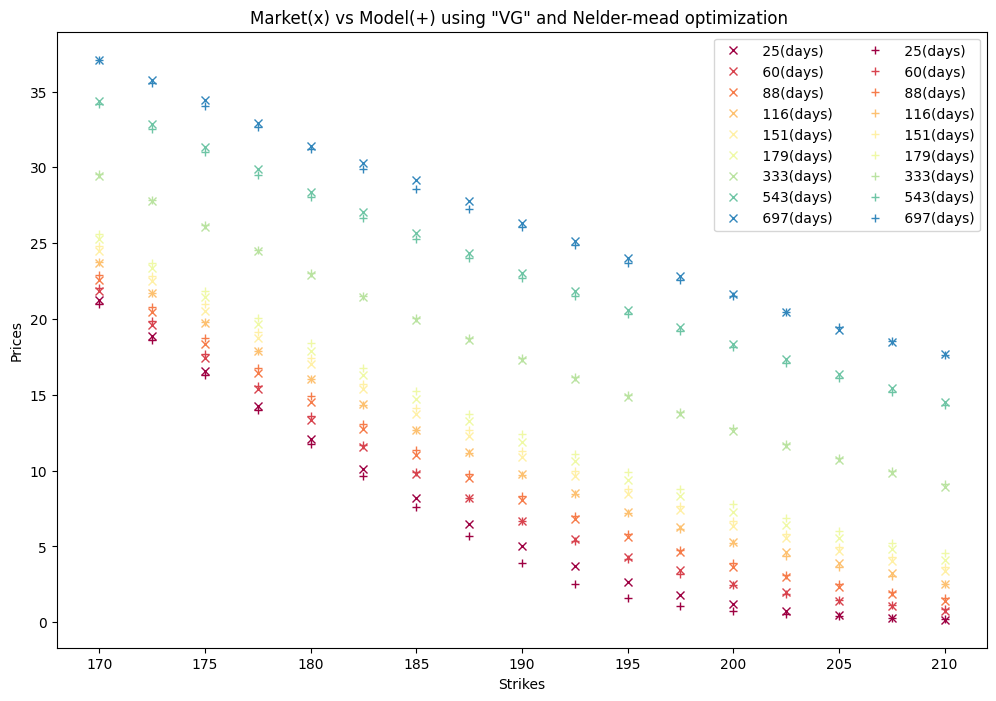

In [99]:
params = [0.20832228,  0.14007012, -0.2237348]

len_T = len(maturities)
len_K = len(strikes)

model_prices = np.zeros((len_T, len_K))

for i in range(len_T):
    for j in range(len_K):
        T = maturity_years[i]
        K = strikes[j]
        [km, CT_km] = pm.price_fft(S0, r, q, T, model, params, K, alpha, eta, n)
        model_prices[i, j] = CT_km[0]

fig = plt.figure(figsize = (12, 8))
ax = plt.gca()
colormap = cm.Spectral

from cycler import cycler

ax.set_prop_cycle(cycler(color = [colormap(i) for i in np.linspace(0.0, 0.9, len_T)]))

for i in range(len_T):
    ax.plot(strikes, market_prices[i, :], 'x', label = f' {maturities[i]}(days)')

for i in range(len_T):
    ax.plot(strikes, model_prices[i, :], '+', label = f' {maturities[i]}(days)')

plt.xlabel('Strikes')
plt.ylabel('Prices')
plt.legend(ncol = 2)
plt.title('Market(x) vs Model(+) using "VG" and Nelder-mead optimization ')
plt.show()


In [113]:
params = [ 0.28,  0.36, -0.26]

num_iter = 0
arg = (market_prices, maturity_years, strikes, S0, r, q, model, alpha, eta, n)

def callback_f(xi):
    global num_iter, arg
    num_iter += 1
    print(f' i = {num_iter}')
    print(f' x_i = {xi}')
    print(f' f_i = {hl.evalues(xi, *arg)}')

t = fmin_bfgs(hl.evalues,
         params,
         args = arg,
         maxiter = 200,
         callback = callback_f,
         disp = True,
         full_output = True)

print(f' Optimal Params = {t[0]}')
print(f' f = {t[1]}')

 i = 1
 x_i = [ 0.20114346  0.35681309 -0.23769288]
 f_i = 0.8035250325936204
 i = 2
 x_i = [ 0.1998732   0.33855927 -0.20128631]
 f_i = 0.5069150961822761
 i = 3
 x_i = [ 0.21197495  0.084113   -0.21789464]
 f_i = 0.36740111267571085
 i = 4
 x_i = [ 0.21291067  0.08814779 -0.21451058]
 f_i = 0.36421372172728106
 i = 5
 x_i = [ 0.21111483  0.11663164 -0.21409211]
 f_i = 0.34004299074083844
 i = 6
 x_i = [ 0.20948591  0.14603005 -0.21284048]
 f_i = 0.33172152911763403
 i = 7
 x_i = [ 0.20952765  0.14771695 -0.21201016]
 f_i = 0.33162241732355874
 i = 8
 x_i = [ 0.20968606  0.15014444 -0.21006922]
 f_i = 0.3314399773730344
 i = 9
 x_i = [ 0.21004683  0.15416309 -0.20604837]
 f_i = 0.3310987956299746
 i = 10
 x_i = [ 0.21081656  0.16135867 -0.19787747]
 f_i = 0.3304664904549249
 i = 11
 x_i = [ 0.21250817  0.17510568 -0.18080874]
 f_i = 0.32945951441687266
 i = 12
 x_i = [ 0.21479653  0.18944604 -0.16008833]
 f_i = 0.3292570839134351
 i = 13
 x_i = [ 0.21379467  0.18148852 -0.16995234]
 f

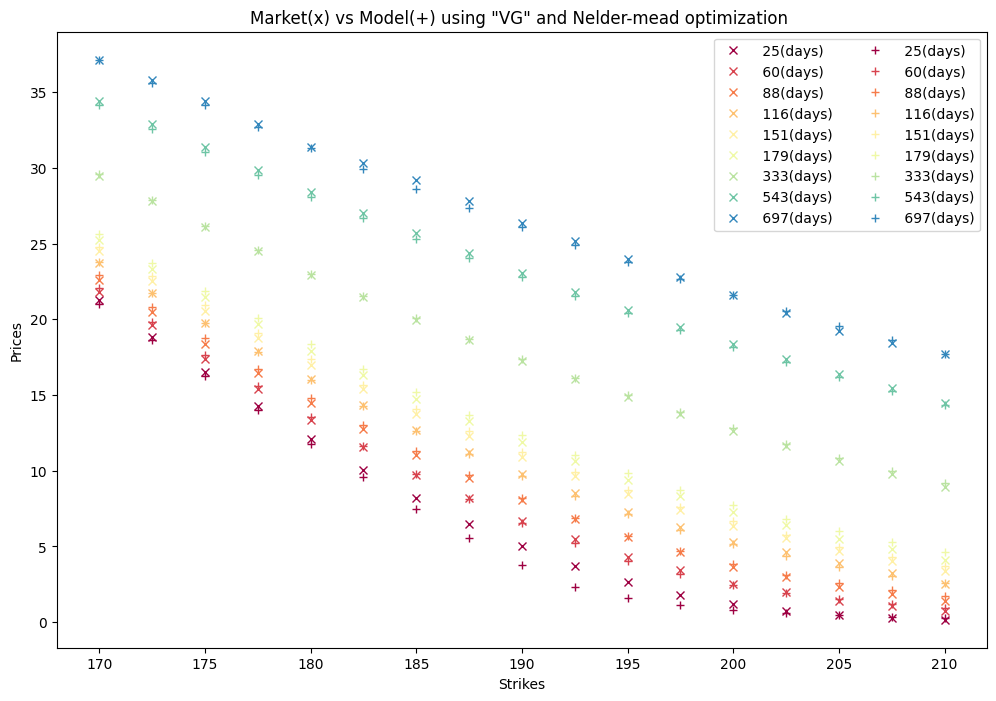

In [115]:
params = [ 0.21382637,  0.17888375, -0.16958413]

len_T = len(maturities)
len_K = len(strikes)

model_prices = np.zeros((len_T, len_K))

for i in range(len_T):
    for j in range(len_K):
        T = maturity_years[i]
        K = strikes[j]
        [km, CT_km] = pm.price_fft(S0, r, q, T, model, params, K, alpha, eta, n)
        model_prices[i, j] = CT_km[0]

fig = plt.figure(figsize = (12, 8))
ax = plt.gca()
colormap = cm.Spectral

from cycler import cycler

ax.set_prop_cycle(cycler(color = [colormap(i) for i in np.linspace(0.0, 0.9, len_T)]))

for i in range(len_T):
    ax.plot(strikes, market_prices[i, :], 'x', label = f' {maturities[i]}(days)')

for i in range(len_T):
    ax.plot(strikes, model_prices[i, :], '+', label = f' {maturities[i]}(days)')

plt.xlabel('Strikes')
plt.ylabel('Prices')
plt.legend(ncol = 2)
plt.title('Market(x) vs Model(+) using "VG" and Nelder-mead optimization ')
plt.show()
